In [180]:
# @title Internal Engine
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from matplotlib.colors import Normalize

#------------------------------------------------------------------------------
# ODE visualizer in the form dy/dx = f(x,y)
# Author: Ethan
#------------------------------------------------------------------------------

# Setup restricted to common functions
x, y = sp.symbols('x y')
cbrt = sp.Function('cbrt')
cuberoot = sp.Function('cuberoot')

_ALLOWED = {
    "x": x, "y": y,
    "sin": sp.sin, "cos": sp.cos, "tan": sp.tan,
    "asin": sp.asin, "acos": sp.acos, "atan": sp.atan,
    "sinh": sp.sinh, "cosh": sp.cosh, "tanh": sp.tanh,
    "exp": sp.exp, "log": sp.log, "sqrt": sp.sqrt,
    "Abs": sp.Abs,
    "pi": sp.pi, "E": sp.E, "e": sp.E, "ln": sp.log,
    "cuberoot": cuberoot,
    "cbrt": cbrt
}

def parse_ode_rhs(rhs_str: str):
    """
    Parse a string like 'x - y', 'sin(x)+y', '(x+y)/(1+x**2)' into a callable f(x,y).
    Use ** for powers.
    """
    expr = sp.sympify(rhs_str, locals=_ALLOWED)
    custom = {"cbrt": np.cbrt, "cuberoot": np.cbrt}
    f_np = sp.lambdify((x, y), expr, modules=[custom, "numpy"])
    return expr, f_np

def slope_field(rhs_str,
                xlim=(-5, 5), ylim=(-5, 5),
                density=25, seg_len=0.35,
                cmap="jet", color_mode="magnitude"):
    """
    Plots the slope field for a given first-order ODE dy/dx = rhs_str.
    rhs_str: string representation of the RHS of the ODE.
    xlim, ylim: tuples (min, max) for x and y axes.
    density: number of arrows per dimension.
    seg_len: length of each segment.
    cmap: colormap for the arrows.
    color_mode:
      - "magnitude": color by magnitude of the slope.
      - "angle": color by angle of the slope.
      - "slope": color by slope value (clipped)
    """
    expr, f = parse_ode_rhs(rhs_str)

    xs = np.linspace(xlim[0], xlim[1], density)
    ys = np.linspace(ylim[0], ylim[1], density)

    X, Y = np.meshgrid(xs, ys)
    U, V = np.ones_like(X), f(X, Y)

    # Normalize vectors for consistent length (optional, but good for slope fields)
    if seg_len is not None:
        norm = np.sqrt(U**2 + V**2)
        mask = np.isfinite(norm) & (norm != 0)
        U = np.where(mask, U / norm * seg_len, 0.0)
        V = np.where(mask, V / norm * seg_len, 0.0)

    fig, ax = plt.subplots(figsize=(8, 8))

    if color_mode == "magnitude":
        colors = np.sqrt(U**2 + V**2)
        norm = Normalize(vmin=colors.min(), vmax=colors.max())
        ax.quiver(X, Y, U, V, colors, cmap=cmap, norm=norm, pivot='mid')
    elif color_mode == "angle":
        angles = np.arctan2(V, U)
        norm = Normalize(vmin=angles.min(), vmax=angles.max())
        ax.quiver(X, Y, U, V, angles, cmap=cmap, norm=norm, pivot='mid')
    elif color_mode == "slope":
        slopes_clipped = np.clip(V/U, -10, 10) # Clip slopes for better color mapping
        norm = Normalize(vmin=slopes_clipped.min(), vmax=slopes_clipped.max())
        ax.quiver(X, Y, U, V, slopes_clipped, cmap=cmap, norm=norm, pivot='mid')
    else:
        ax.quiver(X, Y, U, V, pivot='mid')

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(f'Slope Field for $dy/dx = {sp.latex(expr)}$')
    ax.set_aspect('equal', adjustable='box')
    plt.grid(True)
    plt.show()


In [181]:
# Direction Field Visualizer

# This tool plots direction fields for first-order differential equations.

# Enter the right-hand side of a differential equation of the form:

# dy/dx = f(x, y)

# Then run the cell below.

# ---

### Supported functions:
# - sin, cos, tan
# - exp
# - ln or log
# - sqrt
# - cbrt or cuberoot
# - standard powers using **

# Example (quotations "" are required):
# "3*x - cbrt(y-1)"

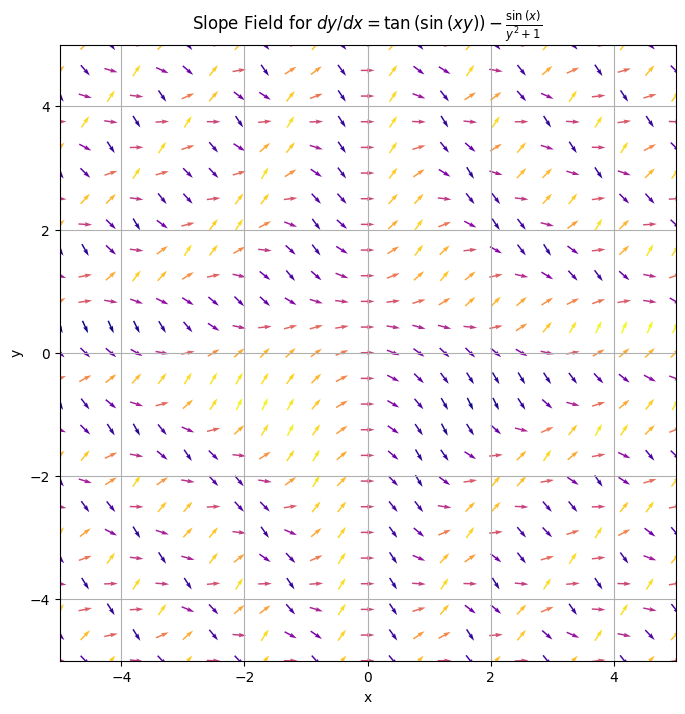

In [182]:
#-------------------------------------------------------------------------------
#-------------------------------------------------------------------------------
#----------- INPUT CELL: ENTER EQUATION BELOW ----------------------------------

rhs = "tan(sin(x*y)) - sin(x)/(1 + y**2)"

#----------- INPUT CELL: ENTER EQUATION ABOVE ----------------------------------
#-------------------------------------------------------------------------------
#-------------------------------------------------------------------------------

# BELOW THIS LINE ARE THE CONTROLS OF THE GRAPH VISUALS, MODIFY IF DESIRED

slope_field(
    rhs_str=rhs,
    xlim=(-3, 3),      # this line controls how many x-values are shown
    ylim=(-3, 3),      # this line controls how many y-values are shown
    density=25,        # this line controls how many 'vectors' appear
    seg_len=0.35,      # this line controls size of 'vectors'
    cmap="turbo",     # this line is the color scheme for the graph
    color_mode="angle" # this line is also the color scheme
)